In [1]:
import matplotlib.pyplot as plt
import numpy as np

### **1**

1. Defina dos listas de valores `x` e `y`, tal que los pares (x,y) cumplan una relación lineal del tipo $y = 2x + 1$. Defina la lista de valores de `x` con 100 puntos en el intervalo de valores que van desde -1 hasta 1.

In [7]:
x = np.linspace(-1,1,100)
y = 2*x+1

2. Grafique la curva generada por los valores (x,y) en color verde, con un ancho `linewidth = 3` y que sea una línea a trazos `linestyle = '--'`. Agregue al gráfico el título 'Relación Lineal'.

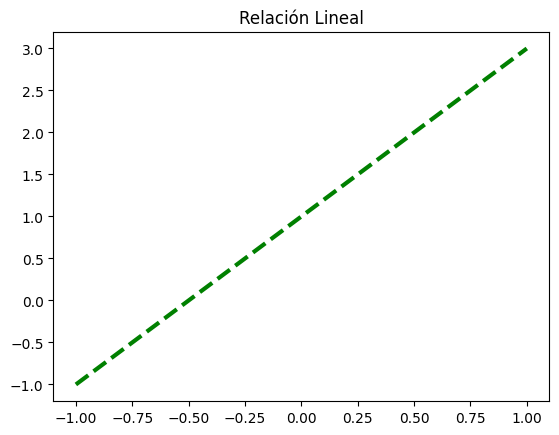

In [11]:
fig = plt.figure()
ax = plt.axes()

ax.plot(x,y, linestyle = "--", linewidth = 3, color= "green")

ax.set(title = "Relación Lineal")

plt.show()

### **2**

Graficar tres subplots, con las curvas (x1,y1),(x2,y2) y (x3,y3), en una única figura. Apilar los subplots en forma vertical y de manera que compartan el eje x.

In [12]:
x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
x3 = np.linspace(-1,1,100)

y1 = 2*x1+1
y2 = x2**2
y3 = x3**-2


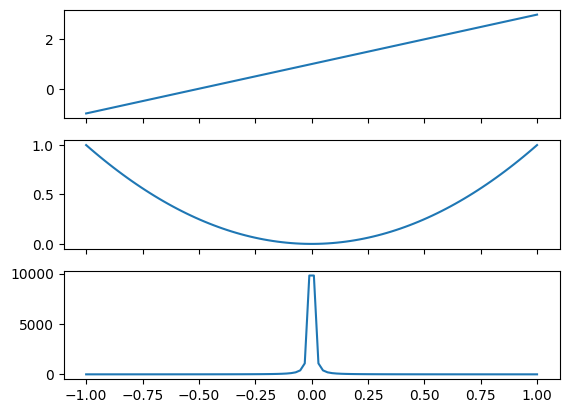

In [13]:
fig, axes = plt.subplots(3,1,sharex = True)
axes[0].plot(x1,y1)
axes[1].plot(x2,y2)
axes[2].plot(x3,y3)

plt.xlim = 3

plt.show()

### **3**
1. ¿Por qué cree que se forman esas líneas horizontales en el gráfico?
2. ¿Qué conclusiones pueden sacar sobre la relación de precio y puntaje observando este gráfico?
3. Tome solo los vinos realizados en Argentina (recuerde usar una máscara) y realice nuevamente un scatter plot de precio vs puntaje para estos vinos.

In [14]:
import pandas as pd

In [17]:
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']

# Cargamos el DataFrame solo con esas columnas
wine_reviews = pd.read_csv('wine_reviews.csv', usecols = fields)
wine_reviews.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


In [18]:
# Tiramos las instancias que tienen un nan en alguno de los features.
wine_reviews.dropna(inplace=True)
wine_reviews.head()

,country,points,price,variety
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir
5,Spain,87,15.0,Tempranillo-Merlot


In [19]:
# Tomamos como coordenadas en x los precios
x = wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
y = wine_reviews.points.values

In [21]:
print(x)
print(type(x))
print(y)
print(type(y))

[15. 14. 13. ... 30. 32. 21.]
<class 'numpy.ndarray'>
[87 87 87 ... 90 90 90]
<class 'numpy.ndarray'>


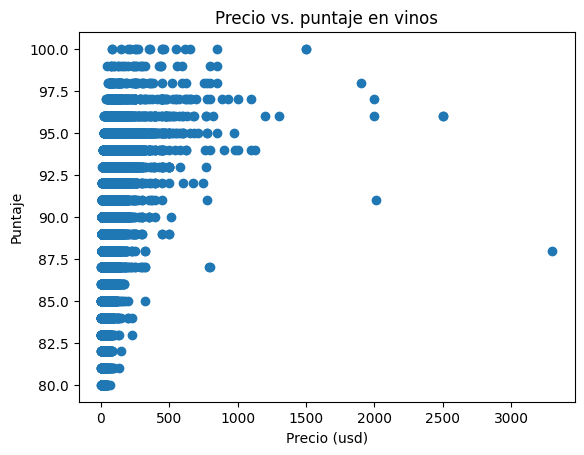

In [22]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos')

plt.show()

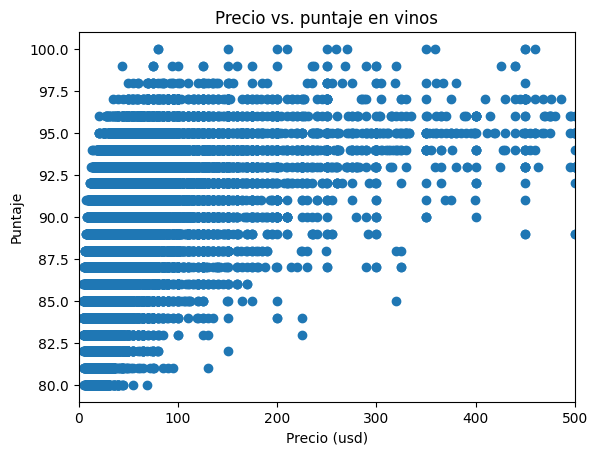

In [24]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,500))

plt.show()

In [25]:
# Solo argentina

ARG_wine_reviews = wine_reviews[wine_reviews['country']=='Argentina']
ARG_wine_reviews.head()

,country,points,price,variety
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
183,Argentina,88,12.0,Torrontés
224,Argentina,90,22.0,Malbec
231,Argentina,85,10.0,Bonarda


In [26]:
# Tomamos como coordenadas en x los precios
precio_arg = ARG_wine_reviews.price.values
# Tomamos como coordenadas en y el puntaje de la review
puntos_arg = ARG_wine_reviews.points.values

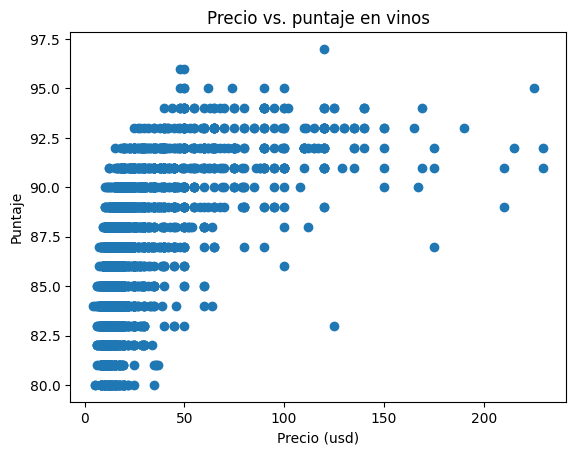

In [28]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(precio_arg, puntos_arg)
ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos')

plt.show()

### **4**

1. Repitan el histograma anterior, pero esta vez cambiando el número de `bins`. Por ejemplo, probar con 5, 50, 500 y 5000. ¿Cuál les parece la opción más adecuada? ¿De qué dependará el número de bins adecuado a seleccionar?

2. Prueben qué sucede si no le pasan el argumento `bins` a la función. Busquen en la bibliografía de la librería que es lo que hace por default la función.

**Nota**: la función `hist` además nos devuelve dos vectores relevantes. El vector `n` donde nos especifica el número de cuentas de cada bin (columna) del histograma. Y el vector `bins`, que nos dice los límites de estos bines (donde empieza y termina cada columna. Noten que el vector 'bins' tiene un largo igual a `len(n)+1`.

Como último ejemplo, vamos a graficar el histograma de precios correspondientes a los vinos argentinos con una calificación de 85 y los vamos a comparar al precio de los vinos argentinos con una calificación de 90.

In [29]:
# Elejimos una distribución con centro en 20 y una desviación igual a 4
mu = 20  # Media de la distribución
sigma = 4  # Desviación Estandar
valores = mu + sigma * np.random.randn(1000)

# Imprimimos la media y la desviación de los valores generados
print('Media:',np.mean(valores))
print('Desvio Estandar:',np.std(valores))
# Recuerden que cuantos mas valores sampleen,
# mas se aproximaran estos valores a los de la distribución.

Media: 19.752700451714468
Desvio Estandar: 3.9984897707031024


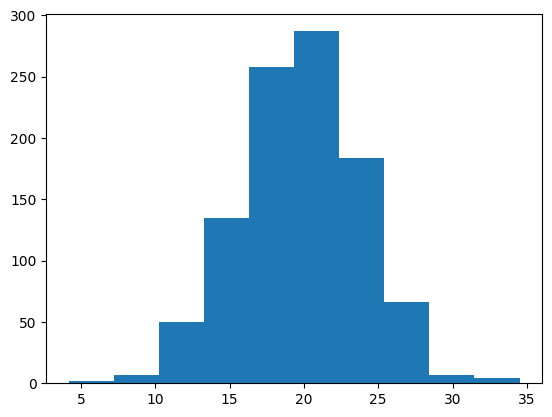

In [30]:
# Aca decidimos la cantidad de bines que queremos tomar
num_bins = 10

# Creamos la figura y los ejes
fig, ax = plt.subplots()

# Ploteamos el histograma
n, bins, _ = ax.hist(valores, bins = num_bins)

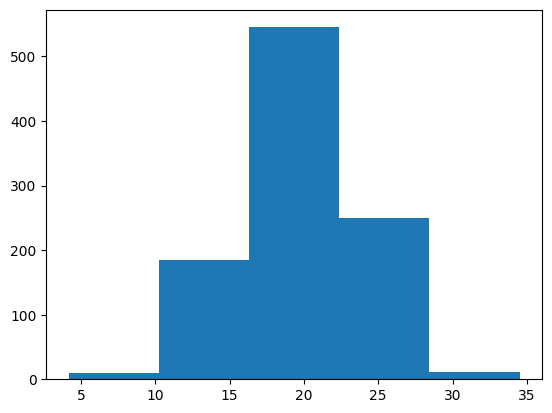

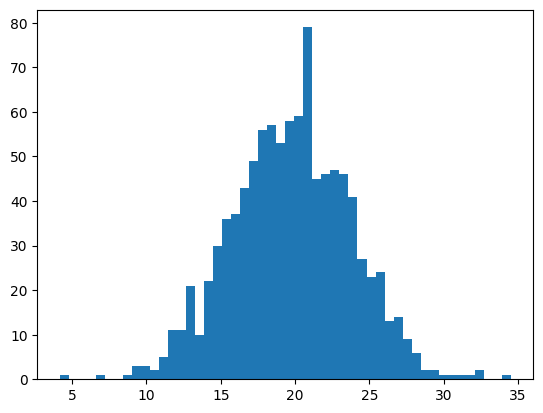

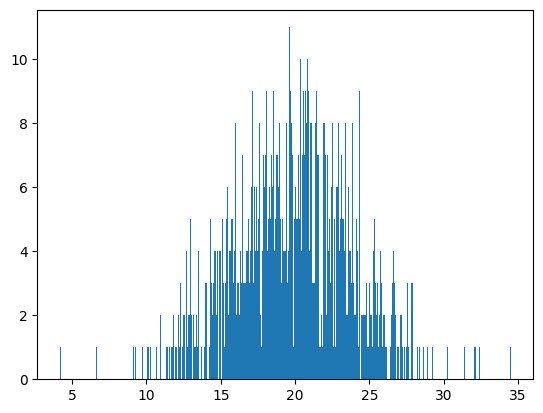

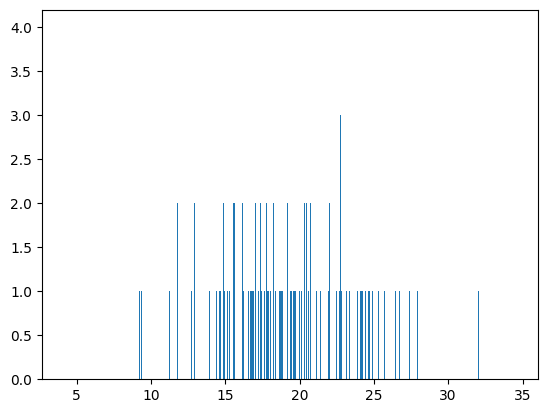

In [31]:
# Aca decidimos la cantidad de bines que queremos tomar
for i_bin in [5,50,500,5000]:
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Ploteamos el histograma
    n, bins, _ = ax.hist(valores, bins = i_bin)

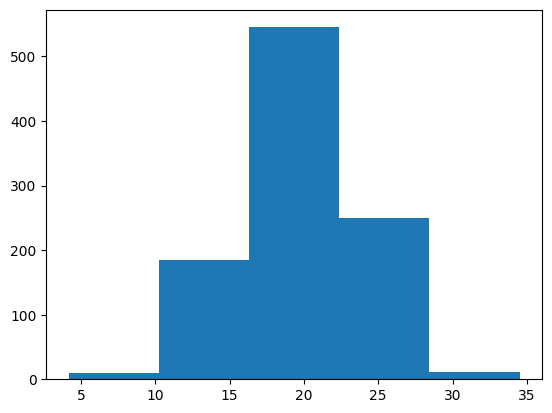

In [32]:
fig, ax = plt.subplots()
# Ploteamos el histograma
n, bins, _ = ax.hist(valores, bins = 5)

In [33]:
# Seleccionamos los vinos con puntaje igual a 85
ARG_wine_85 = ARG_wine_reviews[ARG_wine_reviews['points']==85]
# Seleccionamos los vinos con puntaje igual a 90
ARG_wine_90 = ARG_wine_reviews[ARG_wine_reviews['points']==90]

# Armamos los vectores con los precios de cada vino
precios_arg_85 = ARG_wine_85.price.values
precios_arg_90 = ARG_wine_90.price.values

print('Cantidad de vinos de 85:',len(precios_arg_85))
print('Cantidad de vinos de 90:',len(precios_arg_90))

Cantidad de vinos de 85: 416
Cantidad de vinos de 90: 247


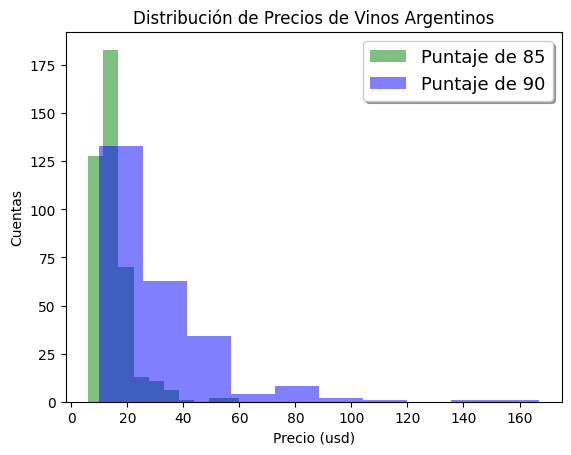

In [36]:
# Definimos la cantidad de bins para cada grupo
n_bins_85 = 10
n_bins_90 = 10

# Creamos la figura y los ejes
fig, ax = plt.subplots()

n, bins, _ = ax.hist(precios_arg_85, n_bins_85, facecolor='g', alpha=0.5, label='Puntaje de 85')
n, bins, _ = ax.hist(precios_arg_90, n_bins_90, facecolor='b', alpha=0.5, label='Puntaje de 90')

ax.set(xlabel='Precio (usd)', ylabel='Cuentas',
       title='Distribución de Precios de Vinos Argentinos') #, xlim = (0,75))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='upper right', shadow=True, fontsize=13)

plt.show()